In [69]:
import numpy as np
import pandas as pd

from scipy import stats

import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.rcParams.update({'font.size': 16,
                      'font.family': 'Helvetica'})

In [2]:
from textblob import TextBlob
from ibm_watson import ToneAnalyzerV3
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator

In [3]:
apikey = 'aBk6uX_UYs9hbNN2R8j6LDsxmftZ9umqb_N8hKMiAXQ9'
url = 'https://api.us-south.tone-analyzer.watson.cloud.ibm.com/instances/3dbc0cbf-93a7-4dbd-9e2c-cfa743e27a5c'

In [4]:
authenticator = IAMAuthenticator(apikey)
ta = ToneAnalyzerV3(
    version='2017-09-21',
    authenticator=authenticator
)

ta.set_service_url(url)

In [5]:
dream_df = pd.read_csv('../data/dreams_data_vF.csv', index_col=0)

In [6]:
dream_df.columns.tolist()

['Insomnia Nights Per Week A',
 'Race/Ethnicity F',
 'Dream Recall',
 'Talking About Dreams',
 'Gender',
 'id',
 'date',
 'description',
 'Education D',
 '2020 President Trump approval',
 'Education A',
 'Personal Finances E',
 'US Region F',
 'Pandemic Dream Report',
 'Dream Tone Pandemic',
 'Pandemic Physical Health',
 'Pandemic Finances',
 'Dream Recall Changes',
 'Pandemic Social',
 'Pandemic Mental Health',
 'Political Ideology',
 'Age Group B',
 'Religious Affiliation B',
 'Personal Finances C',
 'Personal Finances B',
 'Religious Worship A',
 'Race/Ethnicity B',
 'Marital Status B',
 'US Region B',
 'Education B',
 'Insomnia Nights Per Week B',
 'Race/Ethnicity E',
 'Race/Ethnicity C',
 'Typical Dreams: Visitation',
 'Typical Dreams: Being Chased or Attacked',
 'Typical Dreams: Sexual',
 'Typical Dreams: Awareness',
 'Age Group A',
 'Race',
 'Race/Ethnicity D',
 'Political Ideology 2',
 'Marital Status A',
 'Personal Finances A',
 'US Region A',
 'Marital status',
 'Marital Stat

In [8]:
cols = ['id', 'date', 'description', 'Gender', 
        'Insomnia Nights Per Week A', 'Race/Ethnicity F', 'Dream Recall', 'Talking About Dreams',  
        'Education D', '2020 President Trump approval', 'Education A','Personal Finances E',
        'US Region F', 'Pandemic Dream Report', 'Dream Tone Pandemic', 'Pandemic Physical Health','Pandemic Finances',
        'Dream Recall Changes', 'Pandemic Social', 'Pandemic Mental Health', 'Political Ideology', 'Age Group B',
        'Religious Affiliation B', 'Personal Finances C', 'Personal Finances B', 'Religious Worship A', 
        'Race/Ethnicity B', 'Marital Status B', 'US Region B', 'Education B', 'Insomnia Nights Per Week B',
        'Race/Ethnicity E', 'Race/Ethnicity C', 'Typical Dreams: Visitation', 'Typical Dreams: Being Chased or Attacked',
        'Typical Dreams: Sexual', 'Typical Dreams: Awareness', 'Age Group A', 'Race', 'Race/Ethnicity D',
        'Political Ideology 2', 'Marital Status A', 'Personal Finances A', 'US Region A', 'Marital status',
        'Marital Status & Gender', 'Race/Ethnicity A', 'Religious Affiliation A']
dream_df = dream_df[cols]

dream_df = dream_df.rename({'id': 'ID', 'date': 'Date', 'description': 'Description'}, axis=1)
dream_df.head()

,ID,Date,Description,Gender,Insomnia Nights Per Week A,Race/Ethnicity F,Dream Recall,Talking About Dreams,Education D,2020 President Trump approval,...,Race,Race/Ethnicity D,Political Ideology 2,Marital Status A,Personal Finances A,US Region A,Marital status,Marital Status & Gender,Race/Ethnicity A,Religious Affiliation A
0,ID: 2020racialjustice:4119 details,09-21-2020,Is a 74 year old white male I was raised in a ...,Male,2,White,Several times a week,About once a week,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ID: 2020racialjustice:4086 details,09-21-2020,Was trying to get away from shopping center th...,Female,1,White,Several times a week,Two or three times a month,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ID: 2020racialjustice:3938 details,09-21-2020,watching buildings being burned,Female,2,White,Two or three times a month,Less than once a month,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ID: 2020racialjustice:3581 details,09-21-2020,I was on the street in my small hometown. Ther...,Female,5,Hispanic,Several times a week,Several times a week,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ID: 2020racialjustice:2414 details,09-21-2020,My dream was someone came to my house and trie...,Female,6,White,Almost every morning,Almost every morning,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
dream_df['ID'] = dream_df.ID.apply(lambda id_str: id_str[4:-8])

In [11]:
dream_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5848 entries, 0 to 5847
Data columns (total 48 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   ID                                        5848 non-null   object
 1   Date                                      5848 non-null   object
 2   Description                               5848 non-null   object
 3   Gender                                    5811 non-null   object
 4   Insomnia Nights Per Week A                558 non-null    object
 5   Race/Ethnicity F                          270 non-null    object
 6   Dream Recall                              893 non-null    object
 7   Talking About Dreams                      558 non-null    object
 8   Education D                               120 non-null    object
 9   2020 President Trump approval             120 non-null    object
 10  Education A                               527 no

In [12]:
def polarity(text):
    return TextBlob(text).sentiment[0]

def subjectivity(text):
    return TextBlob(text).sentiment[1]

dream_df['Polarity'] = dream_df.Description.apply(polarity)
dream_df['Subjectivity'] = dream_df.Description.apply(subjectivity)
dream_df.head(3)

,ID,Date,Description,Gender,Insomnia Nights Per Week A,Race/Ethnicity F,Dream Recall,Talking About Dreams,Education D,2020 President Trump approval,...,Political Ideology 2,Marital Status A,Personal Finances A,US Region A,Marital status,Marital Status & Gender,Race/Ethnicity A,Religious Affiliation A,Polarity,Subjectivity
0,2020racialjustice:4119,09-21-2020,Is a 74 year old white male I was raised in a ...,Male,2,White,Several times a week,About once a week,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.002564,0.379808
1,2020racialjustice:4086,09-21-2020,Was trying to get away from shopping center th...,Female,1,White,Several times a week,Two or three times a month,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.100000,0.100000
2,2020racialjustice:3938,09-21-2020,watching buildings being burned,Female,2,White,Two or three times a month,Less than once a month,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000


In [13]:
def tones(text):
    return ta.tone(text).get_result()

dream_df['Tones'] = dream_df.Description[:2000].apply(tones)

In [17]:
dream_df['Tones2'] = dream_df['Tones']

In [19]:
dream_df['Tones2'] = dream_df.Description[2000:].apply(tones)

In [23]:
dream_df.head()

,ID,Date,Description,Gender,Insomnia Nights Per Week A,Race/Ethnicity F,Dream Recall,Talking About Dreams,Education D,2020 President Trump approval,...,Personal Finances A,US Region A,Marital status,Marital Status & Gender,Race/Ethnicity A,Religious Affiliation A,Polarity,Subjectivity,Tones,Tones2
0,2020racialjustice:4119,09-21-2020,Is a 74 year old white male I was raised in a ...,Male,2,White,Several times a week,About once a week,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.002564,0.379808,{'document_tone': {'tones': [{'score': 0.54386...,NaN
1,2020racialjustice:4086,09-21-2020,Was trying to get away from shopping center th...,Female,1,White,Several times a week,Two or three times a month,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.100000,0.100000,{'document_tone': {'tones': [{'score': 0.52066...,NaN
2,2020racialjustice:3938,09-21-2020,watching buildings being burned,Female,2,White,Two or three times a month,Less than once a month,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,{'document_tone': {'tones': [{'score': 0.61247...,NaN
3,2020racialjustice:3581,09-21-2020,I was on the street in my small hometown. Ther...,Female,5,Hispanic,Several times a week,Several times a week,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.075000,0.391667,{'document_tone': {'tones': [{'score': 0.70441...,NaN
4,2020racialjustice:2414,09-21-2020,My dream was someone came to my house and trie...,Female,6,White,Almost every morning,Almost every morning,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.360185,0.521296,{'document_tone': {'tones': [{'score': 0.57694...,NaN


In [22]:
dream_df.to_csv('/Users/mekdiyilma/Desktop/dsi/capstones/dreams/data/dreams_data_w_tone_analysis.csv')

In [28]:
dream_df['Tones'].update(dream_df['Tones2'])
dream_df.tail()

,ID,Date,Description,Gender,Insomnia Nights Per Week A,Race/Ethnicity F,Dream Recall,Talking About Dreams,Education D,2020 President Trump approval,...,Personal Finances A,US Region A,Marital status,Marital Status & Gender,Race/Ethnicity A,Religious Affiliation A,Polarity,Subjectivity,Tones,Tones2
5843,mike_journal:mike,06-28-1970,090 It is dark. I am with the platoon in a for...,Male,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.093083,0.397908,{'document_tone': {'tones': [{'score': 0.54610...,{'document_tone': {'tones': [{'score': 0.54610...
5844,mike_journal:mike,06-28-1970,083 On a cancer ward all the patients are men....,Male,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.002211,0.483277,{'document_tone': {'tones': [{'score': 0.63340...,{'document_tone': {'tones': [{'score': 0.63340...
5845,mike_journal:mike,06-28-1970,029 I am in a place that resembles Viet Nam. I...,Male,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.080128,0.561538,{'document_tone': {'tones': [{'score': 0.59707...,{'document_tone': {'tones': [{'score': 0.59707...
5846,mike_journal:mike,06-28-1970,034 I am using a computer. I point to a screen...,Male,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.085474,0.352310,{'document_tone': {'tones': [{'score': 0.57424...,{'document_tone': {'tones': [{'score': 0.57424...
5847,mike_journal:mike,06-28-1970,004 We are on an LZ; I am. saying good bye to ...,Male,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.059083,0.457881,{'document_tone': {'tones': [{'score': 0.54446...,{'document_tone': {'tones': [{'score': 0.54446...


In [31]:
dream_df.drop(['Tones2'], axis=1, inplace=True)

In [32]:
def analytical(tone_dict):
    reduced_tone_dict = tone_dict['document_tone']['tones']
    tone_score = None
    
    for tones in reduced_tone_dict:
        if tones['tone_id'] == 'analytical':
            tone_score = tones['score'] 
    return tone_score

def anger(tone_dict):
    reduced_tone_dict = tone_dict['document_tone']['tones']
    tone_score = None
    
    for tones in reduced_tone_dict:
        if tones['tone_id'] == 'anger':
            tone_score = tones['score'] 
    return tone_score

def fear(tone_dict):
    reduced_tone_dict = tone_dict['document_tone']['tones']
    tone_score = None
    
    for tones in reduced_tone_dict:
        if tones['tone_id'] == 'fear':
            tone_score = tones['score'] 
    return tone_score

def joy(tone_dict):
    reduced_tone_dict = tone_dict['document_tone']['tones']
    tone_score = None
    
    for tones in reduced_tone_dict:
        if tones['tone_id'] == 'joy':
            tone_score = tones['score'] 
    return tone_score

def sadness(tone_dict):
    reduced_tone_dict = tone_dict['document_tone']['tones']
    tone_score = None
    
    for tones in reduced_tone_dict:
        if tones['tone_id'] == 'sadness':
            tone_score = tones['score'] 
    return tone_score

def tentative(tone_dict):
    reduced_tone_dict = tone_dict['document_tone']['tones']
    tone_score = None
    
    for tones in reduced_tone_dict:
        if tones['tone_id'] == 'tentative':
            tone_score = tones['score']       
    return tone_score

In [34]:
dream_df['Analytical'] = dream_df.Tones.apply(analytical)
dream_df['Anger'] = dream_df.Tones.apply(anger)
dream_df['Fear'] = dream_df.Tones.apply(fear)
dream_df['Joy'] = dream_df.Tones.apply(joy)
dream_df['Sadness'] = dream_df.Tones.apply(sadness)
dream_df['Tentative'] = dream_df.Tones.apply(tentative)
dream_df.tail()  

,ID,Date,Description,Gender,Insomnia Nights Per Week A,Race/Ethnicity F,Dream Recall,Talking About Dreams,Education D,2020 President Trump approval,...,Religious Affiliation A,Polarity,Subjectivity,Tones,Analytical,Anger,Fear,Joy,Sadness,Tentative
5843,mike_journal:mike,06-28-1970,090 It is dark. I am with the platoon in a for...,Male,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.093083,0.397908,{'document_tone': {'tones': [{'score': 0.54610...,NaN,NaN,NaN,0.546109,0.619264,NaN
5844,mike_journal:mike,06-28-1970,083 On a cancer ward all the patients are men....,Male,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.002211,0.483277,{'document_tone': {'tones': [{'score': 0.63340...,0.587956,0.633405,NaN,NaN,0.578336,NaN
5845,mike_journal:mike,06-28-1970,029 I am in a place that resembles Viet Nam. I...,Male,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.080128,0.561538,{'document_tone': {'tones': [{'score': 0.59707...,NaN,NaN,0.597077,NaN,NaN,NaN
5846,mike_journal:mike,06-28-1970,034 I am using a computer. I point to a screen...,Male,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.085474,0.352310,{'document_tone': {'tones': [{'score': 0.57424...,0.565445,0.574249,NaN,NaN,0.569484,NaN
5847,mike_journal:mike,06-28-1970,004 We are on an LZ; I am. saying good bye to ...,Male,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.059083,0.457881,{'document_tone': {'tones': [{'score': 0.54446...,0.539095,0.544467,NaN,0.550964,NaN,0.619713


In [35]:
dream_df.describe()

,Polarity,Subjectivity,Analytical,Anger,Fear,Joy,Sadness,Tentative
count,5848.000000,5848.000000,1581.000000,583.000000,1369.000000,2719.000000,2520.000000,3076.000000
mean,0.046460,0.428883,0.659013,0.592388,0.622420,0.595508,0.581166,0.767517
std,0.175918,0.181467,0.104563,0.073545,0.086269,0.070044,0.061963,0.127297
min,-1.000000,0.000000,0.500135,0.500005,0.500082,0.500044,0.500074,0.500163
25%,-0.037541,0.339878,0.574168,0.531322,0.554979,0.545072,0.535929,0.669729
50%,0.033276,0.433333,0.646170,0.576593,0.612472,0.582361,0.569217,0.779803
75%,0.128886,0.527013,0.731735,0.637426,0.681844,0.630604,0.611641,0.871951
max,1.000000,1.000000,0.997678,0.920555,0.969331,1.000000,0.954743,0.994713


In [42]:
dream_df['Date'] = pd.to_datetime(dream_df['Date'])

In [82]:
numeric_cols = ['Polarity', 'Subjectivity', 'Analytical', 'Anger', 'Fear', 'Joy', 'Sadness', 'Tentative']
tone_cols = ['Analytical', 'Anger', 'Fear', 'Joy', 'Sadness', 'Tentative']

In [56]:
bright_colors = ['#333333', '#f2f2f2', '#00B0F5', '#FF1137', '#963FB8', '#FBC400', '#335770', '#0FAF28']
deep_colors   = ['#000000', '#d9d9d9', '#030B6F', '#BC0750', '#4344B6', '#E97C13', '#1F4157', '#018482']

In [83]:
dream_gender_mean = dream_df.groupby('Gender').agg('mean')[tone_cols]
dream_gender_std = dream_df.groupby('Gender').agg('std')[tone_cols]

dream_gender_mean

,Analytical,Anger,Fear,Joy,Sadness,Tentative
Gender,,,,,,
Female,0.655100,0.589658,0.618611,0.593786,0.580302,0.765132
Male,0.665225,0.598037,0.631172,0.600267,0.583040,0.770889


In [84]:
dream_gender_std

,Analytical,Anger,Fear,Joy,Sadness,Tentative
Gender,,,,,,
Female,0.101599,0.070387,0.081943,0.066674,0.062554,0.127117
Male,0.109145,0.080160,0.095466,0.078202,0.060310,0.127760


''

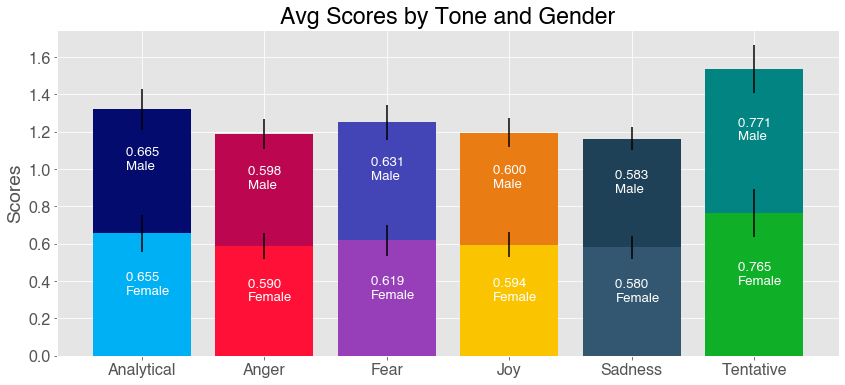

In [134]:
female_means = dream_gender_mean.loc['Female']
female_std = dream_gender_std.loc['Female']

male_means = dream_gender_mean.loc['Male']
male_std = dream_gender_std.loc['Male']

# width = 0.1

fig, ax = plt.subplots(figsize=(14,6))

ax1 = ax.bar(tone_cols, female_means, yerr=female_std, label='Bottom - Female', color=bright_colors[2:])
ax2 = ax.bar(tone_cols, male_means, yerr=male_std, label='Top - Male', bottom=female_means, color=deep_colors[2:])

ax.set_ylabel('Scores')
ax.set_title('Avg Scores by Tone and Gender')
# ax.legend(fontsize='xx-small', loc=2)


for r_female, r_male in zip(ax1, ax2):
    height_female = r_female.get_height()
    height_male = r_male.get_height()
    plt.text(r_female.get_x() + r_female.get_width() / 3, height_female/2, f'{height_female:.3f} \nFemale', 
             color='white', size='small')
    plt.text(r_male.get_x() + r_male.get_width() / 3, height_male*1.5, f'{height_male:.3f} \nMale', 
             color='white',  size='small')

;

In [ ]:
# Traditional Emotion Association
# Female: Fear, Joy, Sadness
# Male: Analytical, Anger, Tentative

Hypothesis Tests for the Difference in Two Proportions (Female vs Male) with the emotion of fear


Ho: proportion of females feeling fear is equal or more than males feeling fear<br>
Ha: proportion of females feeling fear is less than males feeling fear

Ho: pF - pM = 0; pF = pM<br>
Ho: pF - pM < 0; pF < pM

$\alpha$ = 20%

In [143]:
dream_gender_df = dream_df[['ID','Date','Gender','Polarity', 'Subjectivity', 
                            'Analytical', 'Anger', 'Fear', 'Joy', 'Sadness', 'Tentative']]
dream_gender_df.head(3)

,ID,Date,Gender,Polarity,Subjectivity,Analytical,Anger,Fear,Joy,Sadness,Tentative
0,2020racialjustice:4119,2020-09-21,Male,-0.002564,0.379808,NaN,NaN,NaN,0.543866,0.650985,0.689293
1,2020racialjustice:4086,2020-09-21,Female,-0.100000,0.100000,NaN,0.52066,NaN,NaN,NaN,0.920133
2,2020racialjustice:3938,2020-09-21,Female,0.000000,0.000000,NaN,NaN,0.612472,NaN,NaN,NaN


In [157]:
dream_gender_df['Fear_Flag'] = dream_gender_df.Fear.apply(lambda x: 0 if isnan(x) else 1)
dream_gender_df.head(3)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,ID,Date,Gender,Polarity,Subjectivity,Analytical,Anger,Fear,Joy,Sadness,Tentative,Fear_Flag
0,2020racialjustice:4119,2020-09-21,Male,-0.002564,0.379808,NaN,NaN,NaN,0.543866,0.650985,0.689293,0
1,2020racialjustice:4086,2020-09-21,Female,-0.100000,0.100000,NaN,0.52066,NaN,NaN,NaN,0.920133,0
2,2020racialjustice:3938,2020-09-21,Female,0.000000,0.000000,NaN,NaN,0.612472,NaN,NaN,NaN,1


In [188]:
p_fear = dream_gender_df.groupby('Gender').agg(['mean', 'count'])[['Fear_Flag']]
p_fear.rename(columns={'mean':'Fear','count':'Total'}, inplace=True)
# p_fear.reset_index(inplace=True)  
p_fear

Fear_Flag      
            Fear Total
Gender                
Female  0.241652  3923
Male    0.218220  1888

In [201]:
p_female = p_fear.Fear_Flag.Fear['Female']
p_male = p_fear.Fear_Flag.Fear['Male']
p_total = dream_gender_df.Fear_Flag.sum()/dream_gender_df.Fear_Flag.count()
n_female = p_fear.Fear_Flag.Total['Female']
n_male = p_fear.Fear_Flag.Total['Male']


se = np.sqrt(p_total*(1-p_total)*(1/n_female + 1/n_male))
se

0.01186042304557176

In [205]:
(p_female - p_male)/se

1.9756005347345735

In [208]:
p_male*1888 

412.0